## Exemplo SIR
reprodução do exemplo:
https://rce.casadasciencias.org/rceapp/art/2017/020/


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import lmfit
import warnings
import modelos_epidemiologicos as model 

Na tabela seguinte mostra-se os números de infetados relativos a um surto de gripe numa escola com N=763
alunos, durante 14 dias.

14

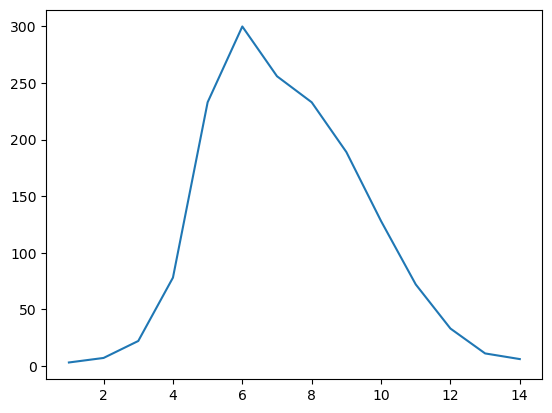

In [2]:
t = np.linspace(1,14,14)

dataI = np.array([3,7,22,	78,	233,	300,	256,	233,	189,	128,	72,	33,	11,	6])
plt.plot(t,dataI);
len(t)

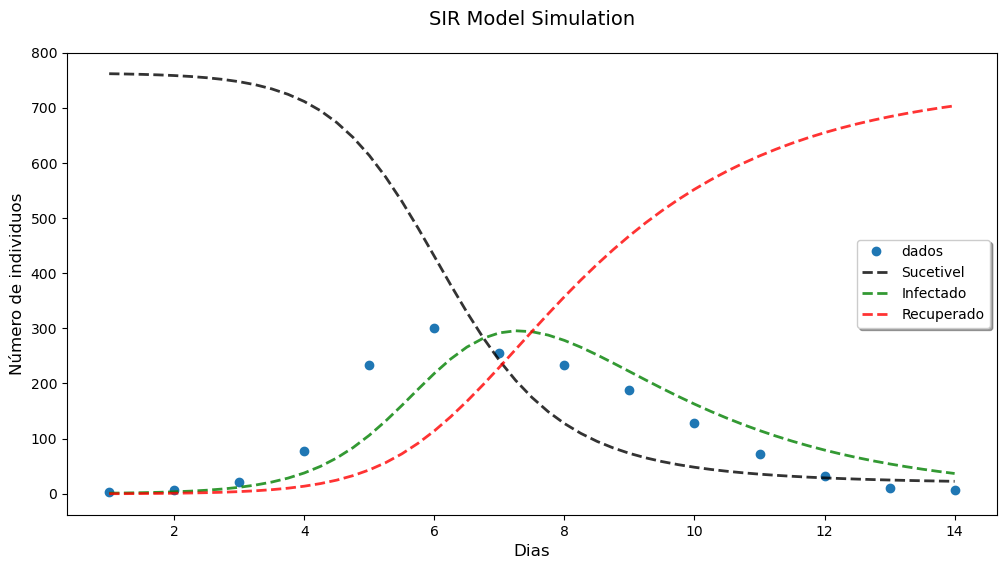

In [6]:
# parametros modelo SIR
N  = 763     # População total
Io = 1       # Infectado 
Ro = 0       # Recuperdo
So = N-Io-Ro #Suceptível

# Paramentos da doenção
beta  = 1.68  # taxa de contato
gamma = 0.44  # taxa de recuperacao

# Incluindo informações no modelo
yo = So, Io, Ro #Suceptivel, infectados e Recuperados

t2 = np.linspace(1,14,53)
out = odeint(model.SIR, yo, t2, args=(N, beta, gamma))
S, I, R = out.T 

plt.figure(figsize=(12, 6))

# visualização
plt.plot(t,dataI,'o',label='dados')
plt.plot(t2, S, 'k--', alpha=0.8, lw=2, label='Sucetivel')
plt.plot(t2, I, 'g--', alpha=0.8, lw=2, label='Infectado')
plt.plot(t2, R, 'r--', alpha=0.8, lw=2, label='Recuperado')


plt.xlabel('Dias', fontsize=12)
plt.ylabel('Número de individuos', fontsize=12)
plt.title('SIR Model Simulation', fontsize=14, pad=20)

# Configure grid and legend
plt.legend(fontsize=10, framealpha=1, shadow=True)
#plt.grid()
plt.show()


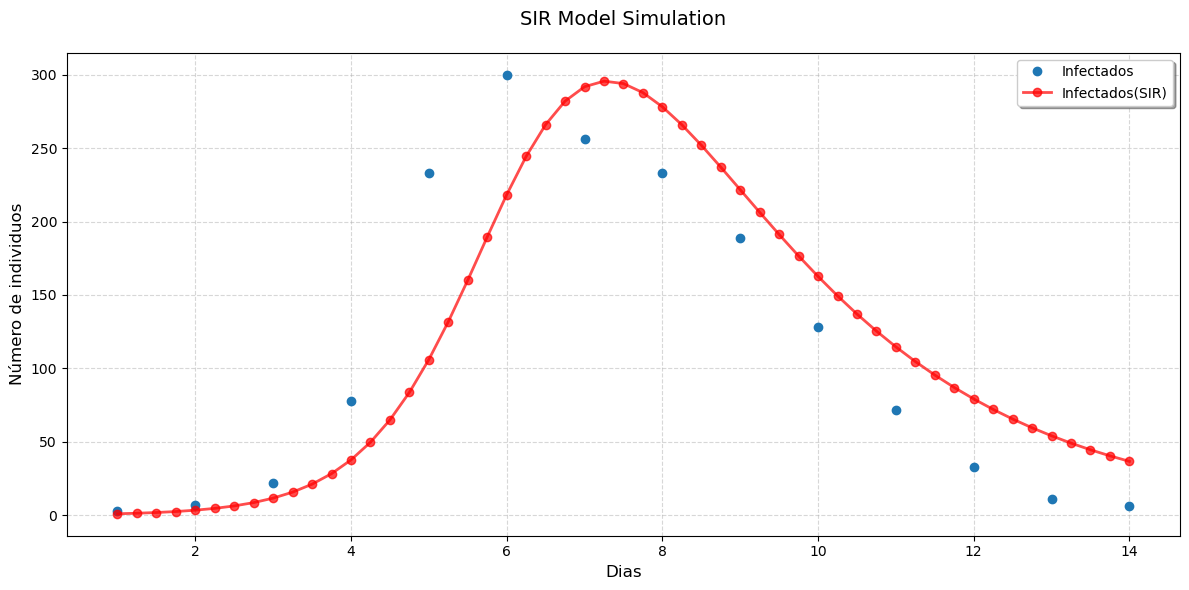

In [7]:
plt.figure(figsize=(12, 6))

plt.plot(t,dataI,'o',label='Infectados')
plt.plot(t2, I, 'ro-', alpha=0.7, lw=2, label='Infectados(SIR)')

# Add proper labels and title
plt.xlabel('Dias', fontsize=12)
plt.ylabel('Número de individuos', fontsize=12)
plt.title('SIR Model Simulation', fontsize=14, pad=20)

# Configure grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10, framealpha=1, shadow=True)
# Adjust layout and show
plt.tight_layout()
plt.show()